# This report is made to explain everything about Linear Programming.

Linear Programming, also sometimes called linear optimisation, involves maximising or minimising a linear objective function, subject to a set of linear inequality or equality constraints.

It is one of the simplest methods of performing Optimum Resource Allocation or Linear Optimization.

We use linear programming at personal and professional spaces.

# Ideal scenarios to use Linear Programming for daily analytics:

1. It can be used to analyze supply chain operations in Manufacturing Sector to maximize efficiency with minimum operation cost.

2. It is used in organized retail for shelf space optimization.

3. Various E-commerce websites and apps use LP to optimize delivery routes which in turn saves operation costs.

4. They can also be used in Stock Market Analysis and Sports.

5. Anywhere and everywhere linear optimiztion is feasible to save costs LP finds a role!!

# A real - life demo to explain Linear Programming

The problem is:

A car company produces 2 models, model A and model B. Long-term projections indicate an expected demand of at least 100 model A cars and 80 model B cars each day. Because of limitations on production capacity, no more than 200 model A cars and 170 model B cars can be made daily. To satisfy a shipping contract, a total of at least 200 cars much be shipped each day. If each model A car sold results in a $2000 dollars$ loss, but each model B car produces a $5000 dollars$ profit, how many of each type should be made daily to maximize net profits?

The Linear Programming approach is 
1. Take a look at the constraints for the problem
2. Visualize all the constraints and find out the feasible region for the above problem
3. Find the optimal solution:
4. We use matplotlib to plot our feasible region
5. We use the Pulp library for this profit maximization problem

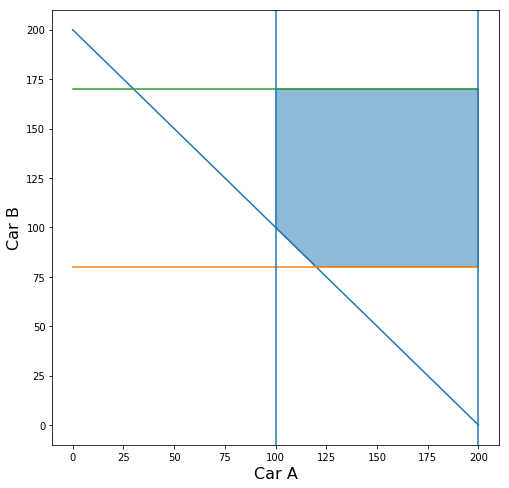

In [2]:
from matplotlib import pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

import numpy as np

# create the plot object
fig, ax = plt.subplots(figsize=(8, 8))
a = np.linspace(0, 200)

plt.plot(a, 200 - a)
plt.plot(a,80 - a*0)
plt.plot(a,170 - a*0)
plt.axvline(x = 100)
plt.axvline(x = 200)


# highlight the feasible region
path = Path([
    (100., 100.),
    (120., 80.),
    (200., 80.),
    (200., 170.),
    (100., 170.),
])


patch = PathPatch(path, label='feasible region', alpha=0.5)
ax.add_patch(patch)

# labels and stuff
plt.xlabel('Car A', fontsize=16)
plt.ylabel('Car B', fontsize=16)
plt.show()

In [3]:
# Use Anaconda Prompt and pip install Pulp an amazing library.
# PuLP is an LP modeler written in python. PuLP can generate MPS or LP files and call GLPK[1], COIN CLP/CBC[2], CPLEX[3], 
# and GUROBI[4] to solve linear problems.
import pulp

In [4]:
# Instantiate our problem class
model = pulp.LpProblem("Profit maximising problem", pulp.LpMaximize)

# the decision variables in this case won’t be continuous (We can’t sell half a car!), so the category is integer 
#- advantage of using a class in this manner. Our # of cars is denoted by A and B respectivelly

A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')

In [5]:
# Our Objective function
model += - 2000 * A + 5000*B, "Profit"

In [6]:
# Constraints we had on Cars can be added to our model as follows
model += A >= 100
model += A <=200
model += B <= 170
model += B >= 80
model += 1 * A + 1 * B >= 200

In [7]:
# Solve our problem
model.solve()
pulp.LpStatus[model.status]  #This prints solution status

'Optimal'

In [8]:
# Print our decision variable values
print ("Production of Car A = {}".format(A.varValue))
print ("Production of Car B = {}".format(B.varValue))

Production of Car A = 100.0
Production of Car B = 170.0


Thus the optimal solution for our problem is 100 cars of A and 170 cars of B